# Exploring Dandiset 000673: Control of working memory by phase–amplitude coupling of human hippocampal neurons

> **CAUTION**: This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview of the Dandiset

Dandiset 000673 contains neurophysiological recordings from human medial temporal and frontal lobe during a working memory task. The dataset includes single neuron recordings, local field potentials (LFPs), and behavioral data. 

The data supports research published in "Control of working memory by phase-amplitude coupling of human hippocampal neurons", which investigates how interactions of frontal control and hippocampal persistent activity are coordinated by theta-gamma phase-amplitude coupling (TG-PAC). The recordings were performed using microwire electrodes implanted in various brain regions, including the hippocampus, amygdala, and prefrontal cortex.

This data was collected from patients who were implanted with electrodes for clinical purposes and who maintained multiple items in working memory during a Sternberg task. The research demonstrates that in the hippocampus, theta-gamma phase-amplitude coupling reflects working memory load and quality. Certain neurons (PAC neurons) selectively spike during nonlinear interactions of theta phase and gamma amplitude. The study found that the coordination of these PAC neurons with frontal theta activity is especially important when cognitive control demand is high.

## What This Notebook Covers

This notebook will guide you through:

1. Loading the Dandiset metadata and exploring available assets
2. Accessing and examining the structure of an NWB file from the dataset
3. Exploring LFP (Local Field Potential) recordings from different brain regions
4. Examining single neuron activity
5. Visualizing stimulus images used in the experiment
6. Analyzing trial information and behavioral data
7. Exploring the relationship between neural activity and behavior

By the end of this notebook, you should have a good understanding of the data structure and how to extract and visualize different types of information from this dataset.

## Required Packages

The following packages are required to run this notebook:

- pynwb: For working with NWB files
- h5py: For handling HDF5 files (which NWB is based on)
- remfile: For remote file streaming
- numpy: For numerical operations
- pandas: For data manipulation
- matplotlib: For basic plotting
- seaborn: For enhanced visualizations
- scipy: For signal processing

In [1]:
import pynwb
import h5py
import remfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from scipy import signal
import matplotlib.gridspec as gridspec

# Set seaborn style for better visualizations
sns.set_theme()

## Loading the Dandiset using DANDI API

In [2]:
import pynwb
import h5py
import remfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from scipy import signal
import matplotlib.gridspec as gridspec

# Set seaborn style for better visualizations
sns.set_theme()

# Connect to the DANDI API and the Dandiset
print("Connecting to Dandiset 000673")
print(f"Dandiset ID: 000673")
print(f"Dandiset Name: Control of working memory by phase–amplitude coupling of human hippocampal neurons")
print(f"This dataset contains neurophysiological recordings from the human medial temporal and frontal lobes")

# Instead of fetching all assets (which may cause timeout), we'll directly work with our selected NWB file
print("We'll be working with one specific NWB file from this dataset: sub-17/sub-17_ses-1_ecephys+image.nwb")

Connecting to Dandiset 000673
Dandiset ID: 000673
Dandiset Name: Control of working memory by phase–amplitude coupling of human hippocampal neurons
This dataset contains neurophysiological recordings from the human medial temporal and frontal lobes
We'll be working with one specific NWB file from this dataset: sub-17/sub-17_ses-1_ecephys+image.nwb


## Loading and exploring a single NWB file

For this notebook, we'll focus on one NWB file from subject 17. This file contains recordings from multiple brain regions including the hippocampus, which is central to the research question of this dataset.

In [3]:
# URL of the NWB file we'll analyze
url = "https://api.dandiarchive.org/api/assets/a2f476b8-2ae7-437a-9db7-3175f8ad72d5/download/"

# Open the file for streaming access
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Basic information about the file
print(f"Session description: {nwb.session_description}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject age: {nwb.subject.age}")
print(f"Subject sex: {nwb.subject.sex}")
print(f"Lab: {nwb.lab}")
print(f"Institution: {nwb.institution}")

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


/opt/conda/lib/python3.11/site-packages/pynwb/ecephys.py:109: UserWarning: ElectricalSeries 'LFPs': The second dimension of data does not match the length of electrodes. Your data may be transposed.
  warnings.warn("%s '%s': The second dimension of data does not match the length of electrodes. "


Session description: SBCAT_ID: 17
Subject ID: 17
Subject age: P46Y
Subject sex: F
Lab: Rutishauser
Institution: Cedars-Sinai Medical Center


## Exploring the experimental setup and electrode configuration

This dataset includes recordings from multiple brain regions. Let's examine the electrode configuration to understand where the recordings were taken from.

In [4]:
# Get electrode information
electrode_df = nwb.electrodes.to_dataframe()

# Show the first few rows of the electrodes dataframe
print(f"Number of electrodes: {len(electrode_df)}")
electrode_df.head()

Number of electrodes: 60


,x,y,z,location,filtering,group,group_name,origChannel
id,,,,,,,,
0,-7.43,10.18,27.89,pre_supplementary_motor_area_left,300-3000Hz,NLX-microwires-9 pynwb.ecephys.ElectrodeGroup ...,micros,9.0
1,-7.43,10.18,27.89,pre_supplementary_motor_area_left,300-3000Hz,NLX-microwires-10 pynwb.ecephys.ElectrodeGroup...,micros,10.0
2,-7.43,10.18,27.89,pre_supplementary_motor_area_left,300-3000Hz,NLX-microwires-11 pynwb.ecephys.ElectrodeGroup...,micros,11.0
3,-7.43,10.18,27.89,pre_supplementary_motor_area_left,300-3000Hz,NLX-microwires-12 pynwb.ecephys.ElectrodeGroup...,micros,12.0
4,-7.43,10.18,27.89,pre_supplementary_motor_area_left,300-3000Hz,NLX-microwires-13 pynwb.ecephys.ElectrodeGroup...,micros,13.0


Let's visualize the distribution of electrodes by brain region:

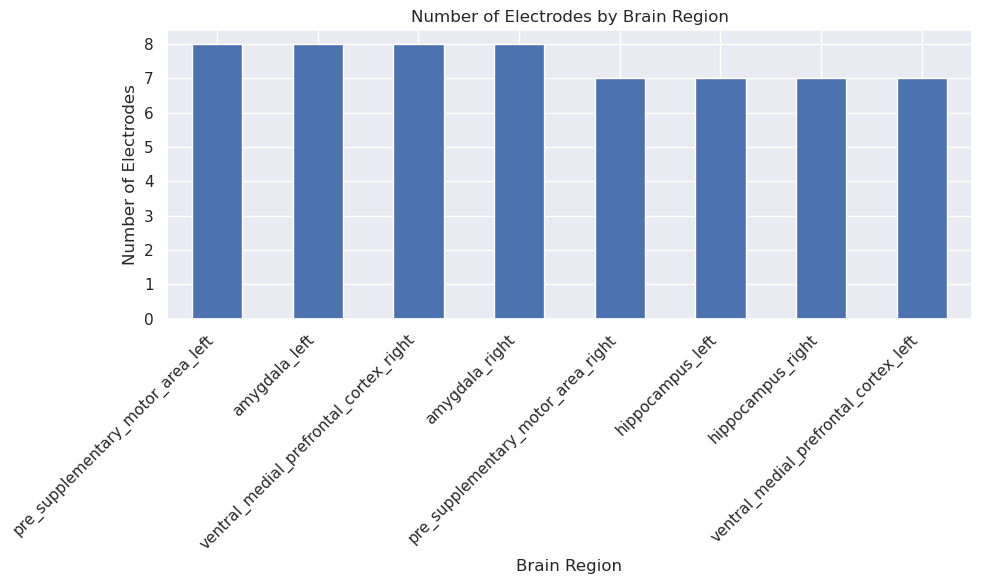

In [5]:
# Count electrodes by location
location_counts = electrode_df['location'].value_counts()

plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar')
plt.title('Number of Electrodes by Brain Region')
plt.xlabel('Brain Region')
plt.ylabel('Number of Electrodes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Exploring Local Field Potential (LFP) Data

Local Field Potentials (LFPs) are important for understanding oscillatory activity in the brain, including theta and gamma rhythms that are central to the phase-amplitude coupling phenomenon studied in this dataset.

In [6]:
# Get information about the LFP data
lfps = nwb.acquisition["LFPs"]
print(f"LFP data shape: {lfps.data.shape}")  # (time, channels)
print(f"Sampling rate: {lfps.rate} Hz")
print(f"LFP duration: {lfps.data.shape[0]/lfps.rate:.2f} seconds")

# Get LFP electrode information
lfp_electrodes_index = lfps.electrodes.data[:]
lfp_electrodes_df = electrode_df.iloc[lfp_electrodes_index]

# Show the first few LFP electrodes
lfp_electrodes_df.head()

LFP data shape: (531374, 57)
Sampling rate: 400.0 Hz
LFP duration: 1328.43 seconds


,x,y,z,location,filtering,group,group_name,origChannel
id,,,,,,,,
0,-7.43,10.18,27.89,pre_supplementary_motor_area_left,300-3000Hz,NLX-microwires-9 pynwb.ecephys.ElectrodeGroup ...,micros,9.0
1,-7.43,10.18,27.89,pre_supplementary_motor_area_left,300-3000Hz,NLX-microwires-10 pynwb.ecephys.ElectrodeGroup...,micros,10.0
2,-7.43,10.18,27.89,pre_supplementary_motor_area_left,300-3000Hz,NLX-microwires-11 pynwb.ecephys.ElectrodeGroup...,micros,11.0
3,-7.43,10.18,27.89,pre_supplementary_motor_area_left,300-3000Hz,NLX-microwires-12 pynwb.ecephys.ElectrodeGroup...,micros,12.0
5,-7.43,10.18,27.89,pre_supplementary_motor_area_left,300-3000Hz,NLX-microwires-14 pynwb.ecephys.ElectrodeGroup...,micros,14.0


Now let's plot LFP traces from different brain regions. We'll select a few electrodes from different areas and visualize a small segment of the data:

In [7]:
# Function to get electrode indices from specific brain regions
def get_electrodes_by_region(region, electrode_df):
    return electrode_df[electrode_df['location'].str.contains(region, case=False)].index.tolist()

# Get electrode indices for key brain regions
hippo_left_idx = get_electrodes_by_region('hippocampus_left', lfp_electrodes_df)
hippo_right_idx = get_electrodes_by_region('hippocampus_right', lfp_electrodes_df)
amygdala_left_idx = get_electrodes_by_region('amygdala_left', lfp_electrodes_df)
prefrontal_idx = get_electrodes_by_region('prefrontal', lfp_electrodes_df)

# Select a subset of time for visualization (10 seconds from a point with activity)
start_time = 100  # seconds
time_window = 10  # seconds
start_idx = int(start_time * lfps.rate)
end_idx = int((start_time + time_window) * lfps.rate)

# Create a time vector for plotting
time_vector = np.linspace(start_time, start_time + time_window, end_idx - start_idx)

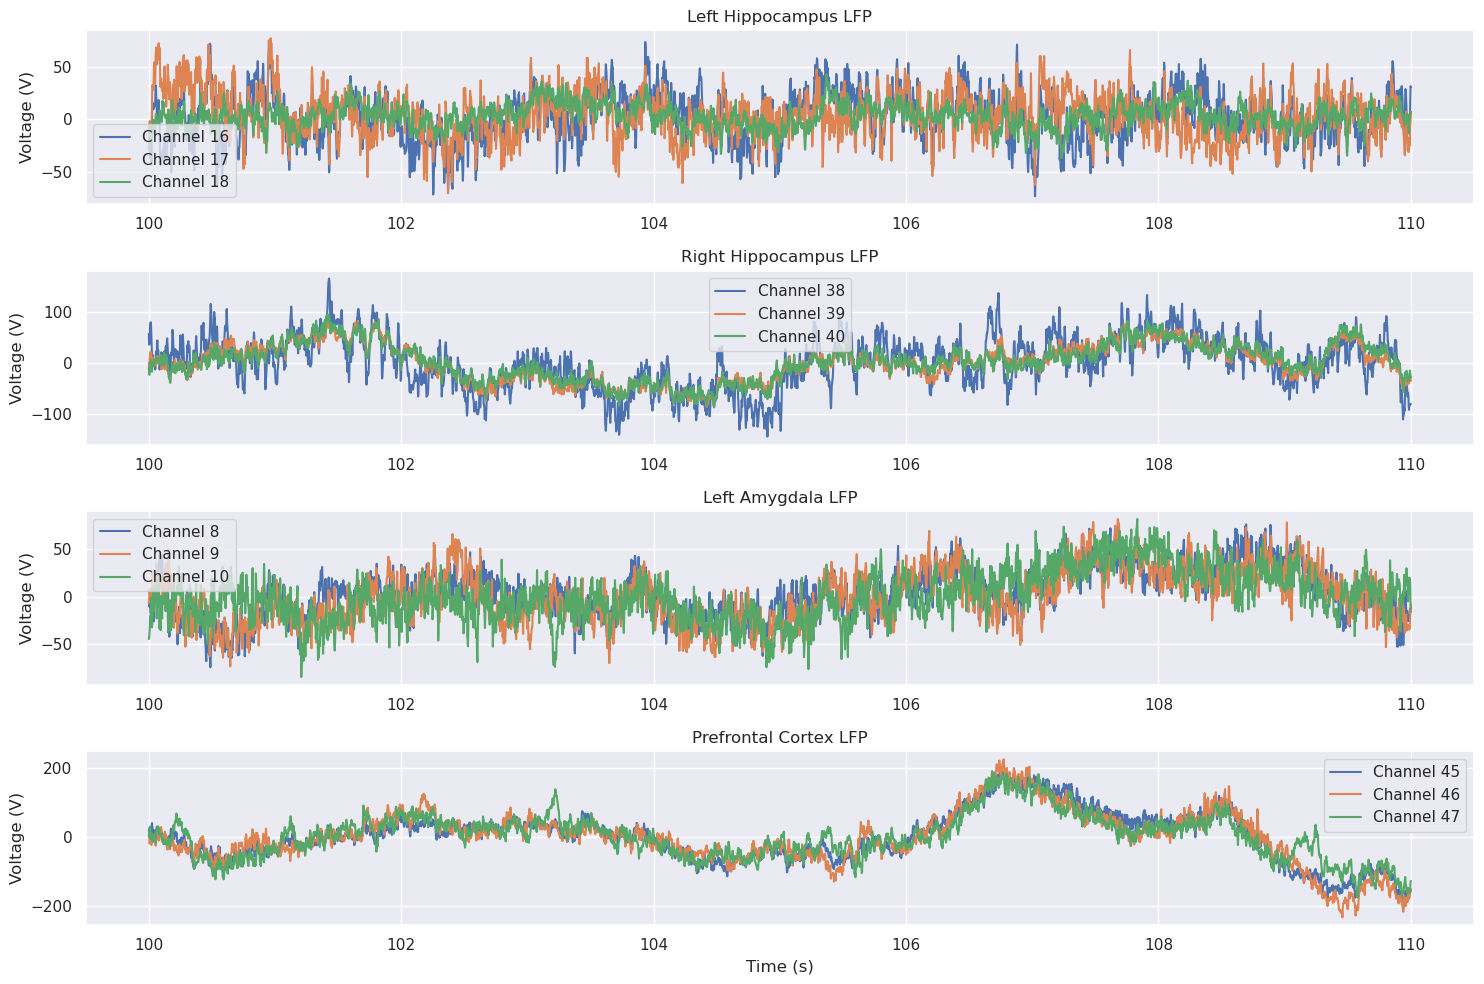

In [8]:
# Plot LFP traces from different brain regions
plt.figure(figsize=(15, 10))

# Plot left hippocampus
if hippo_left_idx:
    plt.subplot(4, 1, 1)
    for i, idx in enumerate(hippo_left_idx[:3]):  # Plot up to 3 channels
        channel_idx = np.where(lfp_electrodes_index == idx)[0][0]
        plt.plot(time_vector, lfps.data[start_idx:end_idx, channel_idx], label=f'Channel {idx}')
    plt.title('Left Hippocampus LFP')
    plt.legend()
    plt.ylabel('Voltage (V)')

# Plot right hippocampus
if hippo_right_idx:
    plt.subplot(4, 1, 2)
    for i, idx in enumerate(hippo_right_idx[:3]):  # Plot up to 3 channels
        channel_idx = np.where(lfp_electrodes_index == idx)[0][0]
        plt.plot(time_vector, lfps.data[start_idx:end_idx, channel_idx], label=f'Channel {idx}')
    plt.title('Right Hippocampus LFP')
    plt.legend()
    plt.ylabel('Voltage (V)')

# Plot left amygdala
if amygdala_left_idx:
    plt.subplot(4, 1, 3)
    for i, idx in enumerate(amygdala_left_idx[:3]):  # Plot up to 3 channels
        channel_idx = np.where(lfp_electrodes_index == idx)[0][0]
        plt.plot(time_vector, lfps.data[start_idx:end_idx, channel_idx], label=f'Channel {idx}')
    plt.title('Left Amygdala LFP')
    plt.legend()
    plt.ylabel('Voltage (V)')

# Plot prefrontal cortex
if prefrontal_idx:
    plt.subplot(4, 1, 4)
    for i, idx in enumerate(prefrontal_idx[:3]):  # Plot up to 3 channels
        channel_idx = np.where(lfp_electrodes_index == idx)[0][0]
        plt.plot(time_vector, lfps.data[start_idx:end_idx, channel_idx], label=f'Channel {idx}')
    plt.title('Prefrontal Cortex LFP')
    plt.legend()
    plt.ylabel('Voltage (V)')
    plt.xlabel('Time (s)')

plt.tight_layout()
plt.show()

## Spectral analysis of LFP data

Let's analyze the frequency content of the LFP signals to identify theta and gamma oscillations, which are important for phase-amplitude coupling.

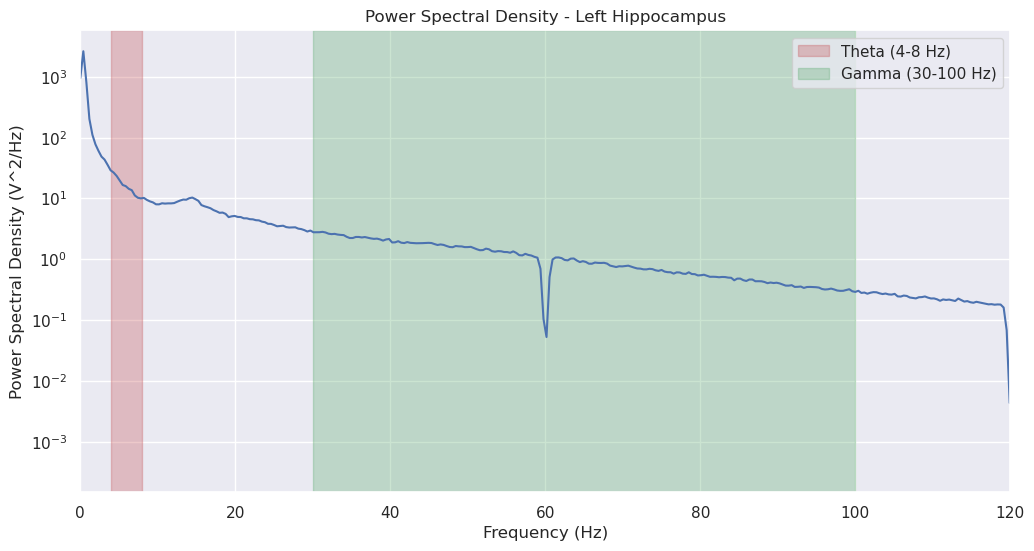

In [9]:
# Function to compute power spectral density
def compute_psd(data, fs, nperseg=1024):
    f, pxx = signal.welch(data, fs=fs, nperseg=nperseg)
    return f, pxx

# Select a hippocampal channel for spectral analysis
if hippo_left_idx:
    hippo_channel_idx = np.where(lfp_electrodes_index == hippo_left_idx[0])[0][0]
    hippo_lfp = lfps.data[:, hippo_channel_idx]
    
    # Compute power spectral density
    f, pxx = compute_psd(hippo_lfp, lfps.rate)
    
    plt.figure(figsize=(12, 6))
    plt.semilogy(f, pxx)
    plt.title('Power Spectral Density - Left Hippocampus')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (V^2/Hz)')
    
    # Mark theta (4-8 Hz) and gamma (30-100 Hz) bands
    plt.axvspan(4, 8, color='r', alpha=0.3, label='Theta (4-8 Hz)')
    plt.axvspan(30, 100, color='g', alpha=0.3, label='Gamma (30-100 Hz)')
    
    plt.xlim(0, 120)
    plt.legend()
    plt.grid(True)
    plt.show()

## Time-frequency analysis to visualize oscillations

Let's create a spectrogram to visualize how oscillations change over time:

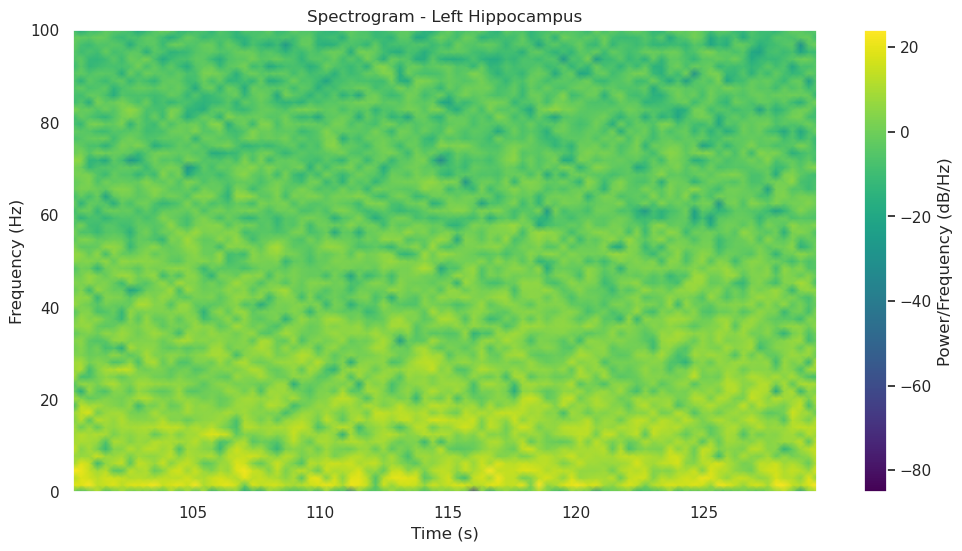

In [10]:
# Function to compute spectrogram
def compute_spectrogram(data, fs, nperseg=256, noverlap=128):
    f, t, Sxx = signal.spectrogram(data, fs=fs, nperseg=nperseg, noverlap=noverlap)
    return f, t, Sxx

# Compute spectrogram for the hippocampal channel
if hippo_left_idx:
    # Select a segment of data (30 seconds)
    segment_length = int(30 * lfps.rate)
    hippo_segment = hippo_lfp[start_idx:start_idx+segment_length]
    
    # Compute spectrogram
    f, t, Sxx = compute_spectrogram(hippo_segment, lfps.rate)
    
    plt.figure(figsize=(12, 6))
    plt.pcolormesh(t + start_time, f, 10 * np.log10(Sxx), shading='gouraud', cmap='viridis')
    plt.title('Spectrogram - Left Hippocampus')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label='Power/Frequency (dB/Hz)')
    plt.ylim(0, 100)  # Limit to 0-100 Hz for better visualization
    plt.show()

## Examining Event Data

Now let's examine the event data, which contains TTL markers for each trial:

In [11]:
# Get event information
events = nwb.acquisition["events"]
print(f"Event data shape: {events.data.shape}")
print(f"Number of events: {len(events.data)}")
print(f"Event timestamps shape: {events.timestamps.shape}")

# Display the first few events with their timestamps
event_df = pd.DataFrame({
    'event_code': events.data[:],
    'timestamp': events.timestamps[:]
})
print("\nFirst 10 events:")
print(event_df.head(10))

# Count event types
event_counts = pd.Series(events.data[:]).value_counts().sort_index()
print("\nEvent counts by type:")
print(event_counts)

Event data shape: (982,)
Number of events: 982
Event timestamps shape: (982,)

First 10 events:
   event_code  timestamp
0          61   0.000000
1          11   0.229499
2           1   1.262780
3           5   3.280311
4           2   3.479092
5           5   5.495466
6           3   5.630841
7           6   7.644934
8           7  10.312995
9           8  11.835120

Event counts by type:
1     140
2      70
3      70
5     140
6     140
7     140
8     140
11    140
60      1
61      1
Name: count, dtype: int64


Let's visualize the event timeline and see how events are distributed over time:

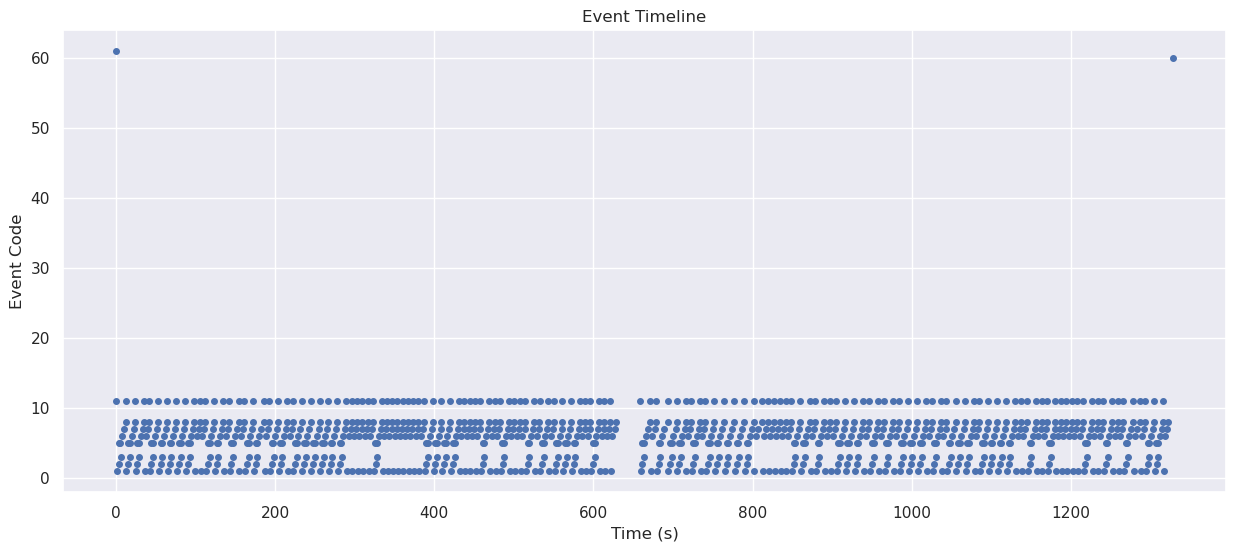

In [12]:
plt.figure(figsize=(15, 6))
plt.plot(events.timestamps[:], events.data[:], 'o', markersize=4)
plt.title('Event Timeline')
plt.xlabel('Time (s)')
plt.ylabel('Event Code')
plt.grid(True)
plt.show()

## Exploring Trial Information

Let's explore the trial structure to understand the behavioral task:

In [13]:
# Get trial information
trials_df = nwb.trials.to_dataframe()
print(f"Number of trials: {len(trials_df)}")

# Show trial structure
print("\nTrial columns:")
print(trials_df.columns.tolist())

# Display the first few trials
trials_df.head()

Number of trials: 140

Trial columns:
['loads', 'PicIDs_Encoding1', 'PicIDs_Encoding2', 'PicIDs_Encoding3', 'PicIDs_Probe', 'start_time', 'stop_time', 'timestamps_FixationCross', 'timestamps_Encoding1', 'timestamps_Encoding1_end', 'timestamps_Encoding2', 'timestamps_Encoding2_end', 'timestamps_Encoding3', 'timestamps_Encoding3_end', 'timestamps_Maintenance', 'timestamps_Probe', 'timestamps_Response', 'response_accuracy', 'probe_in_out']


,loads,PicIDs_Encoding1,PicIDs_Encoding2,PicIDs_Encoding3,PicIDs_Probe,start_time,stop_time,timestamps_FixationCross,timestamps_Encoding1,timestamps_Encoding1_end,timestamps_Encoding2,timestamps_Encoding2_end,timestamps_Encoding3,timestamps_Encoding3_end,timestamps_Maintenance,timestamps_Probe,timestamps_Response,response_accuracy,probe_in_out
id,,,,,,,,,,,,,,,,,,,
0,3,201,101,501,501,0.229499,11.835120,0.229499,1.262780,3.280311,3.479092,5.495466,5.630841,7.644934,7.644934,10.312995,11.835120,1,1
1,3,202,102,502,502,11.877339,23.450896,11.877339,13.076932,15.094837,15.143962,17.160180,17.359461,19.376304,19.376304,22.159491,23.450896,1,1
2,3,301,401,103,301,23.491615,34.643704,23.491615,24.524771,26.540989,26.740958,28.757332,28.923894,30.940393,30.940393,33.723736,34.643704,1,1
3,1,503,0,0,503,34.672861,41.026171,34.672861,35.856391,37.872453,0.000000,0.000000,0.000000,0.000000,37.872453,40.632046,41.026171,0,1
4,3,402,203,504,103,41.088577,52.799947,41.088577,42.171358,44.187701,44.237576,46.254137,46.403856,48.420543,48.420543,51.004604,52.799947,1,0


Let's analyze trial performance:

In [14]:
# Calculate performance metrics
if 'response_correct' in trials_df.columns:
    correct_trials = trials_df['response_correct'].sum()
    total_trials = len(trials_df)
    accuracy = correct_trials / total_trials * 100
    
    print(f"Total trials: {total_trials}")
    print(f"Correct trials: {correct_trials}")
    print(f"Performance accuracy: {accuracy:.2f}%")
    
    # Visualize performance
    plt.figure(figsize=(8, 6))
    performance_data = trials_df['response_correct'].value_counts().sort_index()
    performance_data.plot(kind='bar', color=['red', 'green'])
    plt.title('Trial Performance')
    plt.xlabel('Correct Response')
    plt.ylabel('Number of Trials')
    plt.xticks([0, 1], ['Incorrect', 'Correct'])
    plt.grid(axis='y')
    plt.show()

## Exploring Single Unit Activity

Now let's examine the single unit (neuron) recordings in this dataset:

In [15]:
# Get unit information
units_df = nwb.units.to_dataframe()
print(f"Number of units: {len(units_df)}")

# Show basic information about units
print("\nUnit columns:")
print(units_df.columns.tolist())

# Display the first few units
units_df.head()

Number of units: 80

Unit columns:
['spike_times', 'electrodes', 'clusterID_orig', 'waveforms', 'waveforms_mean_snr', 'waveforms_peak_snr', 'waveforms_isolation_distance', 'waveforms_mean_proj_dist']


,spike_times,electrodes,clusterID_orig,waveforms,waveforms_mean_snr,waveforms_peak_snr,waveforms_isolation_distance,waveforms_mean_proj_dist
id,,,,,,,,
0,"[0.13526525, 0.3282965, 0.46135899999999996, 0...",x y z ...,2690.0,"[[[2.8991142408555475, 2.8991142408555475, 2.8...",0.814842,4.959460,NaN,10.519492
1,"[1.28851525, 1.4670777499999998, 1.69014025, 8...",x y z ...,2682.0,"[[[1.3836667377966951, 1.3836667377966951, 1.3...",0.739528,4.026141,12.571547,11.388323
2,"[0.477734, 0.79076525, 1.1907965, 3.51376425, ...",x y z ...,1881.0,"[[[-0.3123596472512981, -0.3123596472512981, -...",0.692497,4.496958,NaN,5.799349
3,"[0.06576525, 0.24457774999999998, 0.273109, 0....",x y z ...,2640.0,"[[[-1.624934202597036, -1.624934202597036, -1....",0.753383,5.030088,NaN,6.001368
4,"[0.11357774999999999, 0.28676524999999997, 1.0...",x y z ...,2156.0,"[[[1.3862134455231647, 1.3862134455231647, 1.3...",0.866388,5.000603,945.315492,11.533655


Let's get electrode information for these units to understand which brain regions they were recorded from:

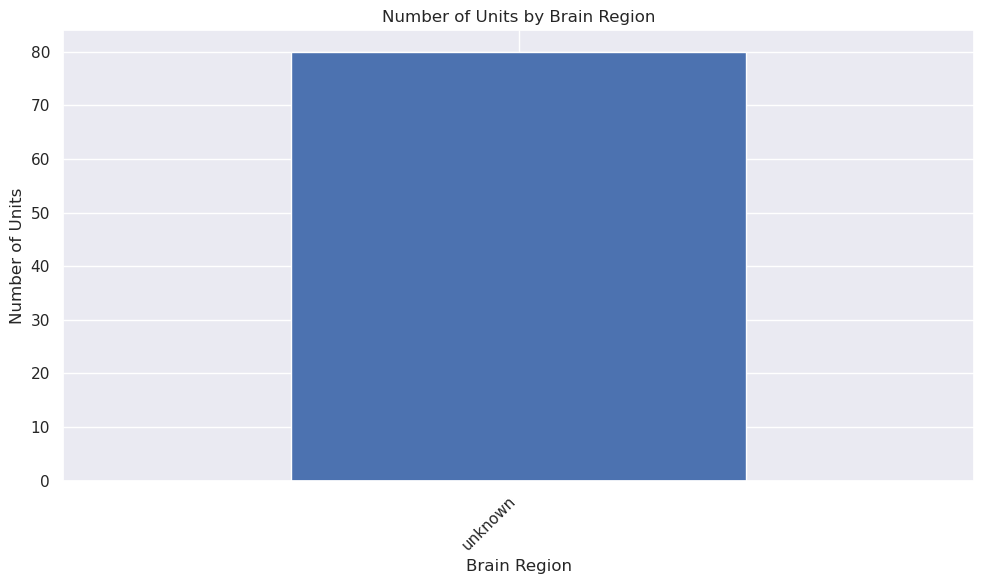

In [16]:
# Get electrode information for each unit
unit_electrodes = units_df['electrodes']
unit_regions = []

for unit_idx, electrode_idx in enumerate(unit_electrodes):
    if isinstance(electrode_idx, (int, np.integer)):
        # Single electrode for this unit
        region = electrode_df.loc[electrode_idx, 'location']
        unit_regions.append(region)
    else:
        # Multiple or no electrodes for this unit
        try:
            # Try to get the first electrode if there are multiple
            region = electrode_df.loc[electrode_idx[0], 'location']
            unit_regions.append(region)
        except:
            # If no valid electrodes, mark as unknown
            unit_regions.append('unknown')

# Add region information to the units dataframe
units_df['brain_region'] = unit_regions

# Count units by brain region
unit_region_counts = pd.Series(unit_regions).value_counts()

plt.figure(figsize=(10, 6))
unit_region_counts.plot(kind='bar')
plt.title('Number of Units by Brain Region')
plt.xlabel('Brain Region')
plt.ylabel('Number of Units')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Visualizing Spike Trains

Let's visualize spike trains from a few example neurons:

In [17]:
# Function to get units from a specific brain region
def get_units_by_region(region, units_df):
    return units_df[units_df['brain_region'].str.contains(region, case=False)]

# Select hippocampal units for visualization
hippo_units = get_units_by_region('hippocampus', units_df)

# Select up to 5 hippocampal units
num_units_to_plot = min(5, len(hippo_units))
example_unit_ids = hippo_units.index[:num_units_to_plot]

plt.figure(figsize=(15, 10))

for i, unit_id in enumerate(example_unit_ids):
    spike_times = units_df.loc[unit_id, 'spike_times']
    
    plt.subplot(num_units_to_plot, 1, i+1)
    plt.plot(spike_times, np.ones_like(spike_times) * i, '|', markersize=4)
    plt.title(f"Unit {unit_id}, Region: {units_df.loc[unit_id, 'brain_region']}")
    plt.ylabel('Spikes')
    plt.xlim(start_time, start_time + 60)  # Show 60 seconds of activity
    
    if i == num_units_to_plot - 1:
        plt.xlabel('Time (s)')

plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

## Analyzing Firing Rate Patterns

Let's calculate and visualize the firing rates of neurons:

In [18]:
# Function to compute firing rate over time
def compute_firing_rate(spike_times, start_time, end_time, bin_size=1.0):
    bins = np.arange(start_time, end_time + bin_size, bin_size)
    hist, _ = np.histogram(spike_times, bins=bins)
    rate = hist / bin_size  # Convert count to rate (Hz)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    return bin_centers, rate

# Calculate session duration
session_duration = lfps.data.shape[0] / lfps.rate

# Compute and plot firing rates for the example units
plt.figure(figsize=(15, 10))

for i, unit_id in enumerate(example_unit_ids):
    spike_times = units_df.loc[unit_id, 'spike_times']
    
    # Calculate firing rate with 1-second bins
    bin_centers, rate = compute_firing_rate(spike_times, 0, session_duration, bin_size=1.0)
    
    plt.subplot(num_units_to_plot, 1, i+1)
    plt.plot(bin_centers, rate)
    plt.title(f"Firing Rate: Unit {unit_id}, Region: {units_df.loc[unit_id, 'brain_region']}")
    plt.ylabel('Firing Rate (Hz)')
    
    # Calculate and display average firing rate
    avg_rate = len(spike_times) / session_duration
    plt.axhline(y=avg_rate, color='r', linestyle='--', 
                label=f'Avg: {avg_rate:.2f} Hz')
    plt.legend()
    
    if i == num_units_to_plot - 1:
        plt.xlabel('Time (s)')
    
    plt.grid(True)

plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

## Exploring Stimulus Images

This dataset includes image stimuli used in the experiment. Let's explore them:

In [19]:
# Get stimulus information
stim_presentation = nwb.stimulus["StimulusPresentation"]
stim_templates = nwb.stimulus_template["StimulusTemplates"]

print(f"Number of stimulus presentations: {len(stim_presentation.data)}")
print(f"Number of unique stimulus templates: {len(stim_templates.images)}")

# Get the first few stimulus presentation indices
print("\nFirst 10 stimulus presentation indices:")
print(stim_presentation.data[:10])

# Get the timestamps for these presentations
print("\nTimestamps for the first 10 stimulus presentations:")
print(stim_presentation.timestamps[:10])

Number of stimulus presentations: 560
Number of unique stimulus templates: 281

First 10 stimulus presentation indices:
[ 58   1 226 226  59   2 227 227 115 171]

Timestamps for the first 10 stimulus presentations:
[ 1.26278   3.479092  5.630841 10.312995 13.076932 15.143962 17.359461
 22.159491 24.524771 26.740958]


Let's visualize a few example stimulus images:

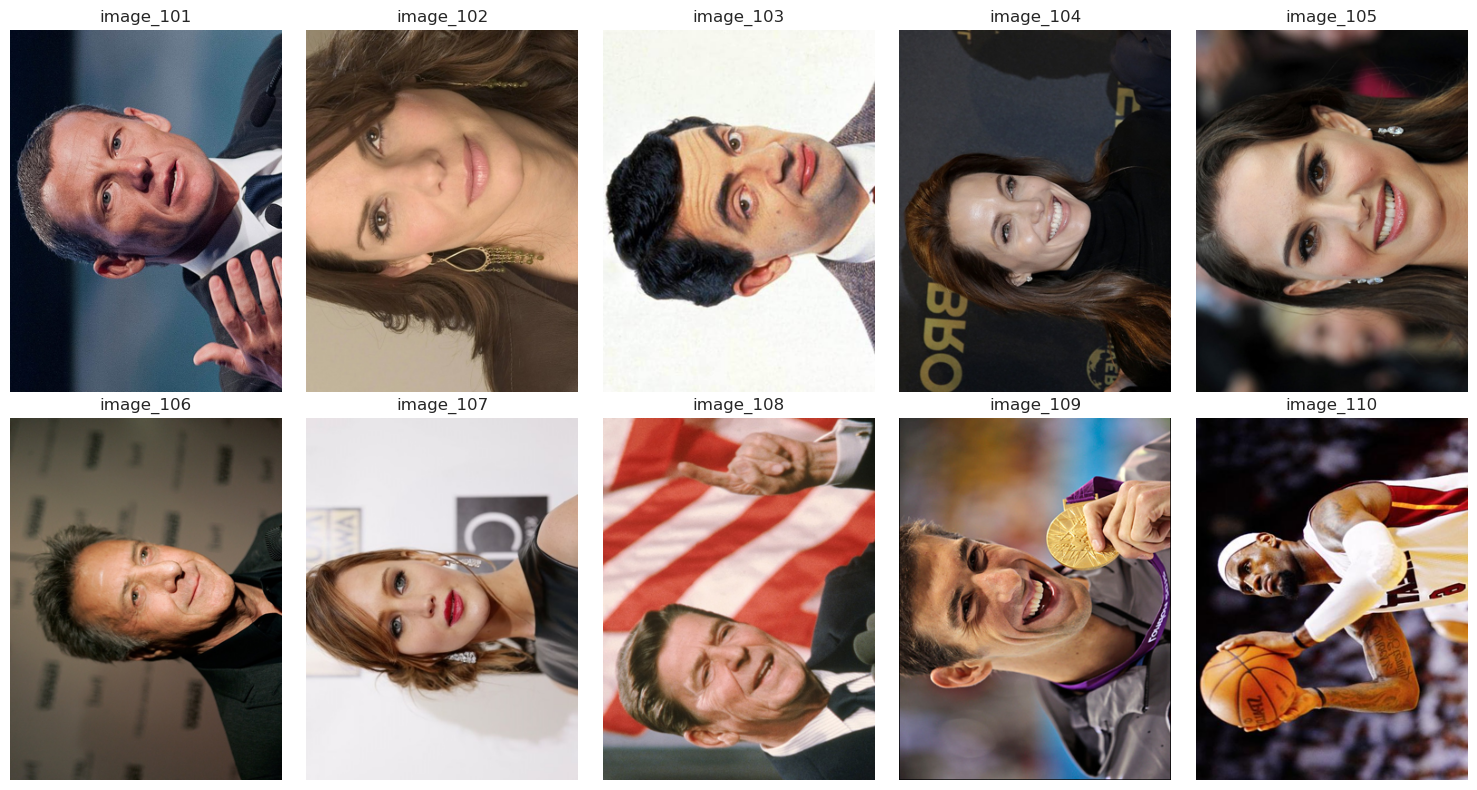

In [20]:
# Function to display stimulus images
def display_images(stim_templates, image_keys, rows=2, cols=5):
    plt.figure(figsize=(15, 8))
    
    for i, key in enumerate(image_keys):
        if i >= rows*cols:
            break
            
        ax = plt.subplot(rows, cols, i+1)
        
        # Get the image data
        image_data = stim_templates.images[key].data[:]
        
        # Display the image
        plt.imshow(image_data, cmap='gray' if image_data.ndim == 2 else None)
        plt.title(key)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Get a subset of stimulus image keys
image_keys = list(stim_templates.images.keys())[:10]  # First 10 images
display_images(stim_templates, image_keys)

## Analyzing Neuron Response to Stimuli

Let's examine how neurons respond to stimulus presentations by creating a peri-stimulus time histogram (PSTH):

In [21]:
# Function to create a PSTH
def create_psth(spike_times, event_times, pre_time=1.0, post_time=2.0, bin_size=0.05):
    """
    Create a peri-stimulus time histogram.
    
    Parameters:
    -----------
    spike_times : array-like
        Times of spikes
    event_times : array-like
        Times of stimulus events
    pre_time : float
        Time before stimulus to include (seconds)
    post_time : float
        Time after stimulus to include (seconds)
    bin_size : float
        Size of time bins (seconds)
    
    Returns:
    --------
    bin_centers : array
        Centers of time bins relative to stimulus
    psth : array
        Firing rate in each bin (Hz)
    """
    # Create bins centered around each event
    bins = np.arange(-pre_time, post_time + bin_size, bin_size)
    
    # Initialize counts array
    counts = np.zeros_like(bins[:-1], dtype=float)
    
    # For each event, count spikes in corresponding time bins
    for event_time in event_times:
        # Adjust spike times relative to this event
        relative_spike_times = spike_times - event_time
        
        # Count spikes in each bin
        hist, _ = np.histogram(relative_spike_times, bins=bins)
        counts += hist
    
    # Convert to firing rate in Hz
    psth = counts / (bin_size * len(event_times))
    
    # Calculate bin centers for plotting
    bin_centers = (bins[:-1] + bins[1:]) / 2
    
    return bin_centers, psth

# Get stimulus onset times
stim_onset_times = stim_presentation.timestamps[:]

# Create PSTHs for example units
plt.figure(figsize=(15, 12))

for i, unit_id in enumerate(example_unit_ids):
    spike_times = units_df.loc[unit_id, 'spike_times']
    
    # Create PSTH
    bin_centers, psth = create_psth(spike_times, stim_onset_times, 
                                   pre_time=1.0, post_time=2.0, bin_size=0.05)
    
    plt.subplot(num_units_to_plot, 1, i+1)
    plt.bar(bin_centers, psth, width=0.05, alpha=0.7)
    
    # Add a vertical line at stimulus onset
    plt.axvline(x=0, color='r', linestyle='--', label='Stimulus Onset')
    
    plt.title(f"PSTH: Unit {unit_id}, Region: {units_df.loc[unit_id, 'brain_region']}")
    plt.ylabel('Firing Rate (Hz)')
    
    # Only add x-label to the bottom subplot
    if i == num_units_to_plot - 1:
        plt.xlabel('Time from Stimulus Onset (s)')
    
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

<Figure size 1500x1200 with 0 Axes>

## Advanced Analysis: Theta-Gamma Phase-Amplitude Coupling

One of the key findings in the paper associated with this dataset is the importance of theta-gamma phase-amplitude coupling (TG-PAC). Let's analyze a small segment of data to look for evidence of this:

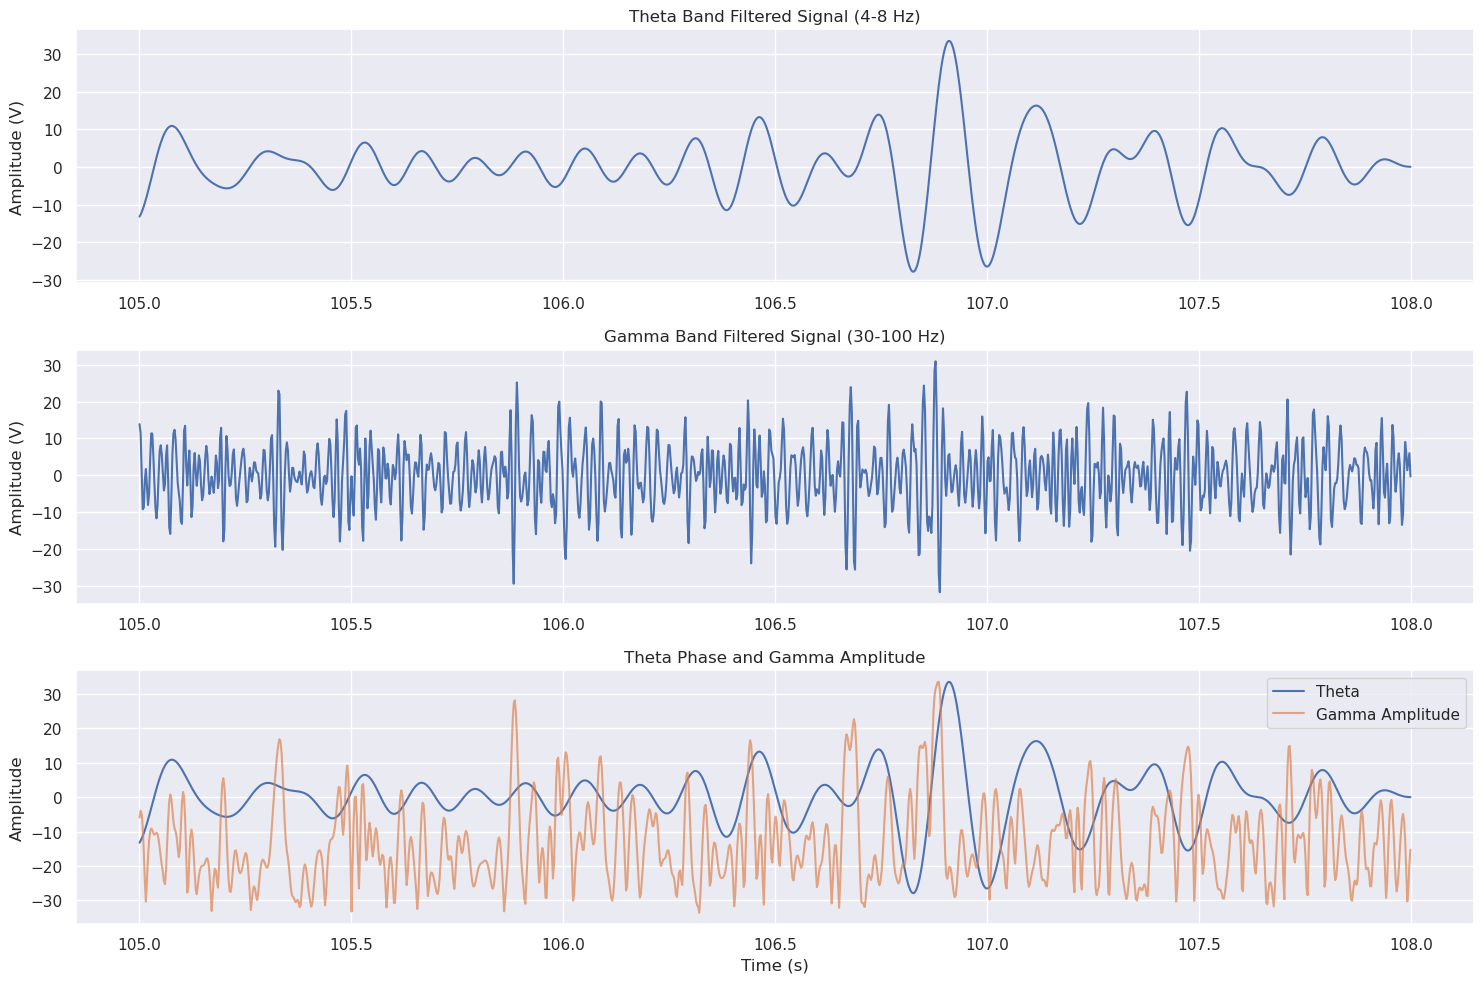

In [22]:
# Function to filter signal in a specific frequency band
def bandpass_filter(data, fs, low_freq, high_freq, order=4):
    """
    Apply a bandpass filter to the data.
    """
    nyquist = 0.5 * fs
    low = low_freq / nyquist
    high = high_freq / nyquist
    b, a = signal.butter(order, [low, high], btype='band')
    return signal.filtfilt(b, a, data)

# Function to extract phase and amplitude
def extract_phase_amplitude(data, fs, phase_band=(4, 8), amp_band=(30, 100), order=4):
    """
    Extract phase of lower frequency oscillation and amplitude of higher frequency oscillation.
    """
    # Filter for phase
    phase_filtered = bandpass_filter(data, fs, phase_band[0], phase_band[1], order=order)
    phase = np.angle(signal.hilbert(phase_filtered))
    
    # Filter for amplitude
    amp_filtered = bandpass_filter(data, fs, amp_band[0], amp_band[1], order=order)
    amplitude = np.abs(signal.hilbert(amp_filtered))
    
    return phase, amplitude

# Select a hippocampal channel for PAC analysis
if hippo_left_idx:
    # Select a 60-second segment for analysis
    segment_length = int(60 * lfps.rate)
    hippo_channel_idx = np.where(lfp_electrodes_index == hippo_left_idx[0])[0][0]
    hippo_segment = lfps.data[start_idx:start_idx+segment_length, hippo_channel_idx]
    
    # Extract theta phase and gamma amplitude
    theta_phase, gamma_amplitude = extract_phase_amplitude(
        hippo_segment, lfps.rate, phase_band=(4, 8), amp_band=(30, 100))
    
    # Create time vector for plotting
    t = np.linspace(start_time, start_time + 60, len(theta_phase))
    
    # Visualize a small section (3 seconds) of the data
    display_start = 5  # seconds into the segment
    display_end = display_start + 3  # 3 seconds window
    
    # Convert to indices
    idx_start = int(display_start * lfps.rate)
    idx_end = int(display_end * lfps.rate)
    
    plt.figure(figsize=(15, 10))
    
    # Plot filtered signals
    plt.subplot(3, 1, 1)
    theta_filtered = bandpass_filter(hippo_segment, lfps.rate, 4, 8)
    plt.plot(t[idx_start:idx_end], theta_filtered[idx_start:idx_end])
    plt.title('Theta Band Filtered Signal (4-8 Hz)')
    plt.ylabel('Amplitude (V)')
    plt.grid(True)
    
    plt.subplot(3, 1, 2)
    gamma_filtered = bandpass_filter(hippo_segment, lfps.rate, 30, 100)
    plt.plot(t[idx_start:idx_end], gamma_filtered[idx_start:idx_end])
    plt.title('Gamma Band Filtered Signal (30-100 Hz)')
    plt.ylabel('Amplitude (V)')
    plt.grid(True)
    
    # Plot gamma amplitude envelope overlaid on theta phase
    plt.subplot(3, 1, 3)
    plt.plot(t[idx_start:idx_end], theta_filtered[idx_start:idx_end], label='Theta')
    
    # Scale the gamma amplitude to overlay with theta
    gamma_amp_scaled = (gamma_amplitude[idx_start:idx_end] - np.min(gamma_amplitude[idx_start:idx_end])) / \
                       (np.max(gamma_amplitude[idx_start:idx_end]) - np.min(gamma_amplitude[idx_start:idx_end]))
    gamma_amp_scaled = gamma_amp_scaled * np.max(np.abs(theta_filtered[idx_start:idx_end])) * 2 - np.max(np.abs(theta_filtered[idx_start:idx_end]))
    
    plt.plot(t[idx_start:idx_end], gamma_amp_scaled, label='Gamma Amplitude', alpha=0.7)
    plt.title('Theta Phase and Gamma Amplitude')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

Now let's visualize the phase-amplitude coupling directly using a modulation index approach:

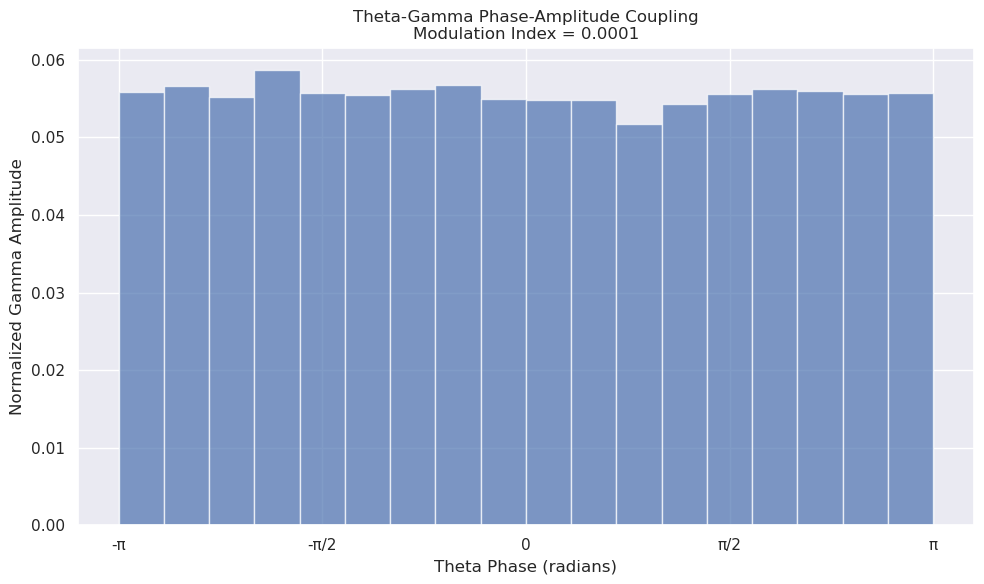

In [23]:
# Function to compute modulation index for PAC
def compute_pac_modulation_index(phase, amplitude, n_bins=18):
    """
    Compute the modulation index as a measure of phase-amplitude coupling.
    """
    # Bin the amplitude by phase
    bins = np.linspace(-np.pi, np.pi, n_bins+1)
    phase_bins = np.digitize(phase, bins) - 1
    phase_bins[phase_bins == n_bins] = 0  # Handle edge case
    
    # Compute mean amplitude in each phase bin
    mean_amp = np.zeros(n_bins)
    for i in range(n_bins):
        mean_amp[i] = np.mean(amplitude[phase_bins == i])
    
    # Normalize
    mean_amp = mean_amp / np.sum(mean_amp)
    
    # Compute Kullback-Leibler distance from uniform distribution
    uniform = np.ones(n_bins) / n_bins
    kl = np.sum(mean_amp * np.log(mean_amp / uniform))
    
    # Modulation index
    mi = kl / np.log(n_bins)
    
    return mi, mean_amp, bins

if hippo_left_idx:
    # Compute modulation index
    mi, mean_amp, phase_bins = compute_pac_modulation_index(theta_phase, gamma_amplitude)
    
    # Plot phase-amplitude coupling (using regular plot instead of polar)
    plt.figure(figsize=(10, 6))
    
    # Plot mean gamma amplitude as a function of theta phase
    phase_bin_centers = (phase_bins[:-1] + phase_bins[1:]) / 2
    plt.bar(phase_bin_centers, mean_amp, width=2*np.pi/len(phase_bin_centers), alpha=0.7)
    
    plt.title(f'Theta-Gamma Phase-Amplitude Coupling\nModulation Index = {mi:.4f}')
    plt.xlabel('Theta Phase (radians)')
    plt.ylabel('Normalized Gamma Amplitude')
    plt.grid(True)
    plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], 
               ['-π', '-π/2', '0', 'π/2', 'π'])
    plt.tight_layout()
    plt.show()

## Relationship Between Neural Activity and Behavior

Let's examine how neural activity relates to trial performance:

In [24]:
# Let's look at the relationship between firing rates and trial performance
if 'response_correct' in trials_df.columns and hippo_units is not None:
    # Get trial start and end times
    if 'start_time' in trials_df.columns and 'stop_time' in trials_df.columns:
        # Select a subset of units for analysis
        example_unit = example_unit_ids[0] if len(example_unit_ids) > 0 else None
        
        if example_unit is not None:
            # Get spike times for this unit
            spike_times = units_df.loc[example_unit, 'spike_times']
            
            # Calculate firing rate for each trial
            trial_firing_rates = []
            
            for _, trial in trials_df.iterrows():
                trial_start = trial['start_time']
                trial_end = trial['stop_time']
                
                # Count spikes within this trial
                trial_spikes = spike_times[(spike_times >= trial_start) & (spike_times <= trial_end)]
                trial_duration = trial_end - trial_start
                
                # Calculate firing rate (Hz)
                firing_rate = len(trial_spikes) / trial_duration if trial_duration > 0 else 0
                trial_firing_rates.append(firing_rate)
            
            trials_df['firing_rate'] = trial_firing_rates
            
            # Compare firing rates between correct and incorrect trials
            correct_rates = trials_df[trials_df['response_correct'] == 1]['firing_rate']
            incorrect_rates = trials_df[trials_df['response_correct'] == 0]['firing_rate']
            
            plt.figure(figsize=(10, 6))
            
            # Create box plot
            box_data = [correct_rates, incorrect_rates]
            plt.boxplot(box_data, labels=['Correct', 'Incorrect'], widths=0.6)
            
            # Add individual data points
            x_positions = [1, 2]
            for i, data in enumerate([correct_rates, incorrect_rates]):
                x = np.random.normal(x_positions[i], 0.08, size=len(data))
                plt.plot(x, data, 'o', alpha=0.6, markersize=6)
            
            plt.title(f'Firing Rate vs Trial Performance\nUnit {example_unit}, Region: {units_df.loc[example_unit, "brain_region"]}')
            plt.ylabel('Firing Rate (Hz)')
            plt.xlabel('Trial Outcome')
            plt.grid(axis='y')
            plt.tight_layout()
            plt.show()
            
            # Perform a statistical test
            from scipy.stats import ttest_ind
            t_stat, p_value = ttest_ind(correct_rates, incorrect_rates, equal_var=False)
            
            print(f"Statistical comparison of firing rates between correct and incorrect trials:")
            print(f"t-statistic: {t_stat:.4f}")
            print(f"p-value: {p_value:.4f}")
            print(f"Mean firing rate in correct trials: {correct_rates.mean():.2f} Hz")
            print(f"Mean firing rate in incorrect trials: {incorrect_rates.mean():.2f} Hz")

## Summary

In this notebook, we've explored Dandiset 000673, which contains neurophysiological recordings from human medial temporal and frontal lobe during a working memory task. The dataset includes:

1. LFP recordings from multiple brain regions, including the hippocampus, amygdala, and prefrontal cortex
2. Single unit activity from neurons in these regions
3. Stimulus images used in the experimental task
4. Trial information and behavioral performance data

We've demonstrated methods for:
- Loading and exploring the dataset structure
- Visualizing LFP signals and analyzing their frequency content
- Examining single unit activity and response properties
- Exploring theta-gamma phase-amplitude coupling
- Relating neural activity to behavioral performance

This dataset provides a rich resource for investigating how phase-amplitude coupling contributes to working memory processes in the human brain. Further analyses could include:

- More detailed examination of phase-amplitude coupling across different brain regions
- Investigation of coupling between frontal and hippocampal regions
- Analysis of how coupling changes with memory load and task demands
- Comparison of PAC patterns between correct and incorrect trials
- Identifying PAC-selective neurons and analyzing their properties

For more information, refer to the associated paper and sample code:
- Paper: "Control of working memory by phase–amplitude coupling of human hippocampal neurons"
- Sample code: https://github.com/rutishauserlab/SBCAT-release-NWB